
# Linear vs Logistic Regression — **NumPy Training (Raw / No Functions)** + Visual Comparison

This notebook is intentionally written in a **raw / explicit style** (no helper functions) so learners can see *exactly* what happens.

We will compare:

- **Linear Regression**: predicts a real-valued score **ŷ = w·x + b**
- **Logistic Regression**: predicts a probability **p = sigmoid(w·x + b)**

Dataset:

- `X = [1, 2, 3, 7, 8, 9]`
- `y = [1, 1, 1, 0, 0, 0]` (binary labels)

---

<div style="background:#E8F4FF; border-left:6px solid #2B7DE9; padding:12px; border-radius:10px;">
<b>Key idea</b><br>
Linear regression fits a straight line to minimize <b>Mean Squared Error</b>.<br>
Logistic regression fits a sigmoid curve to minimize <b>Binary Cross-Entropy (Log Loss)</b>.<br>
</div>

<div style="background:#FFF5F5; border-left:6px solid #E53E3E; padding:12px; border-radius:10px;">
<b>Important</b><br>
We will standardize <code>X</code> (mean 0, std 1) to keep gradient descent stable and avoid NaNs.
Plots will still be shown in the <b>original</b> X scale.
</div>



<div style="background:#F0FFF4; border-left:6px solid #2F855A; padding:12px; border-radius:10px;">
<b>Step 1 — Imports</b>
</div>


In [1]:

import numpy as np
import matplotlib.pyplot as plt



<div style="background:#FFFBEB; border-left:6px solid #D69E2E; padding:12px; border-radius:10px;">
<b>Step 2 — Load data</b><br>
We reshape into column vectors so matrix math is consistent.
</div>


In [2]:

X = np.array([1, 2, 3, 7, 8, 9], dtype=np.float64).reshape(-1, 1)  # (n, 1)
y = np.array([1, 1, 1, 0, 0, 0], dtype=np.float64).reshape(-1, 1)  # (n, 1)

n = X.shape[0]
print("n =", n)
print("X:", X.ravel())
print("y:", y.ravel())


n = 6
X: [1. 2. 3. 7. 8. 9.]
y: [1. 1. 1. 0. 0. 0.]



<div style="background:#E8F4FF; border-left:6px solid #2B7DE9; padding:12px; border-radius:10px;">
<b>Step 3 — Visualize the raw data</b>
</div>


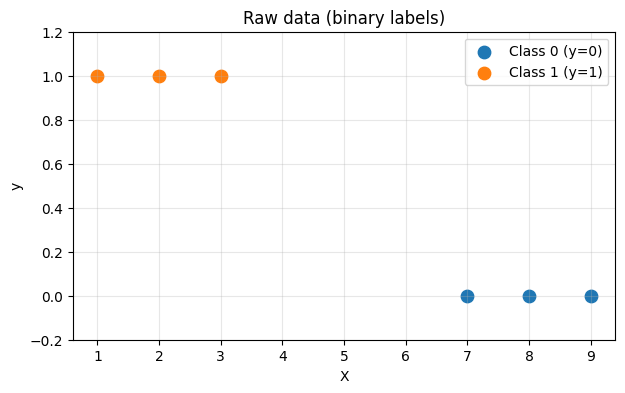

In [3]:
# Color points by class (y=0 vs y=1)
mask0 = (y.ravel() == 0)
mask1 = (y.ravel() == 1)

plt.figure(figsize=(7, 4))
plt.scatter(X[mask0].ravel(), y[mask0].ravel(), s=80, label="Class 0 (y=0)")
plt.scatter(X[mask1].ravel(), y[mask1].ravel(), s=80, label="Class 1 (y=1)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Raw data (binary labels)")
plt.ylim(-0.2, 1.2)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()



<div style="background:#FFF5F5; border-left:6px solid #E53E3E; padding:12px; border-radius:10px;">
<b>Step 4 — Standardize X (to avoid NaNs)</b><br>
We compute:<br>
<b>X_std = (X - μ) / σ</b><br><br>
This makes gradient descent steps much more stable.
</div>


In [4]:

mu = float(np.mean(X))
sigma = float(np.std(X))
X_std = (X - mu) / sigma

print("mu =", mu)
print("sigma =", sigma)
print("X_std:", np.round(X_std.ravel(), 4))


mu = 5.0
sigma = 3.1091263510296048
X_std: [-1.2865 -0.9649 -0.6433  0.6433  0.9649  1.2865]



<div style="background:#F0FFF4; border-left:6px solid #2F855A; padding:12px; border-radius:10px;">
<b>Step 5 — Linear Regression training (raw gradient descent)</b><br>
Model: <b>ŷ = w·x + b</b><br>
Loss: <b>MSE = mean((ŷ - y)^2)</b><br><br>
We'll train on <code>X_std</code>, then convert parameters back to original X scale.
</div>


In [5]:

# Initialize parameters (on standardized X)
w_lin_s = 0.0
b_lin_s = 0.0

# Choose a safe learning rate (1D case)
# For MSE with model y_hat = w*x + b:
# A safe-ish lr can be about 1/L where L = (2/n) * (X^T X)
xtx = float((X_std.T @ X_std).ravel()[0])
L = (2.0 / n) * xtx
lr_lin = 1.0 / L
epochs_lin = 3000

print("Linear: xtx =", xtx)
print("Linear: L   =", L)
print("Linear: lr  =", lr_lin)

loss_lin_history = []

for epoch in range(epochs_lin):
    # Forward: predict
    y_hat = X_std * w_lin_s + b_lin_s  # (n,1) because X_std is (n,1)

    # Loss: MSE
    loss = float(np.mean((y_hat - y) ** 2))
    loss_lin_history.append(loss)

    # Stop if something goes wrong
    if not np.isfinite(loss):
        print("Non-finite loss at epoch", epoch, "=> stopping")
        break

    # Gradients:
    # d/dw MSE = (2/n) * sum( x * (y_hat - y) )
    # d/db MSE = (2/n) * sum( (y_hat - y) )
    dw = float((2.0 / n) * np.sum(X_std * (y_hat - y)))
    db = float((2.0 / n) * np.sum(y_hat - y))

    # Update
    w_lin_s = w_lin_s - lr_lin * dw
    b_lin_s = b_lin_s - lr_lin * db

    if epoch % 500 == 0:
        print(f"epoch={epoch:4d} loss={loss:.6f} w_std={w_lin_s:.6f} b_std={b_lin_s:.6f}")

print("\nTrained (standardized scale):")
print("w_lin_s =", w_lin_s)
print("b_lin_s =", b_lin_s)

# Convert standardized parameters -> original scale:
# y = w_s*((x - mu)/sigma) + b_s = (w_s/sigma)*x + (b_s - w_s*mu/sigma)
w_lin = w_lin_s / sigma
b_lin = b_lin_s - (w_lin_s * mu / sigma)

print("\nConverted (original X scale):")
print("w_lin =", w_lin)
print("b_lin =", b_lin)


Linear: xtx = 6.0
Linear: L   = 2.0
Linear: lr  = 0.5
epoch=   0 loss=0.500000 w_std=-0.482451 b_std=0.500000
epoch= 500 loss=0.017241 w_std=-0.482451 b_std=0.500000
epoch=1000 loss=0.017241 w_std=-0.482451 b_std=0.500000
epoch=1500 loss=0.017241 w_std=-0.482451 b_std=0.500000
epoch=2000 loss=0.017241 w_std=-0.482451 b_std=0.500000
epoch=2500 loss=0.017241 w_std=-0.482451 b_std=0.500000

Trained (standardized scale):
w_lin_s = -0.4824506406770077
b_lin_s = 0.5

Converted (original X scale):
w_lin = -0.15517241379310348
b_lin = 1.2758620689655173



<div style="background:#FFFBEB; border-left:6px solid #D69E2E; padding:12px; border-radius:10px;">
<b>Step 6 — Plot linear regression training loss</b>
</div>


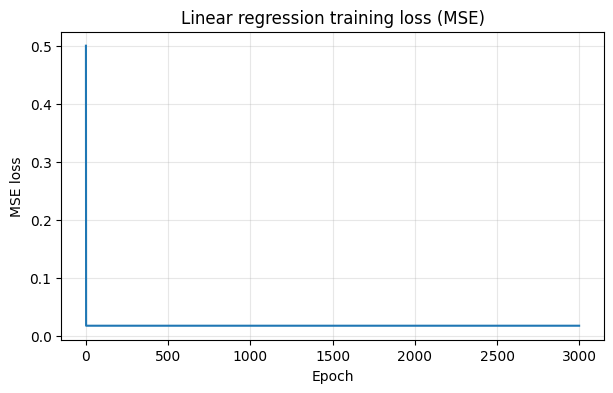

In [6]:

plt.figure(figsize=(7, 4))
plt.plot(loss_lin_history)
plt.xlabel("Epoch")
plt.ylabel("MSE loss")
plt.title("Linear regression training loss (MSE)")
plt.grid(True, alpha=0.3)
plt.show()



<div style="background:#FFFBEB; border-left:6px solid #D69E2E; padding:12px; border-radius:10px;">
<b>Step 6B — Plot the training data with different colors for each class</b><br>
This helps you visually see how the two classes are distributed along X.
</div>


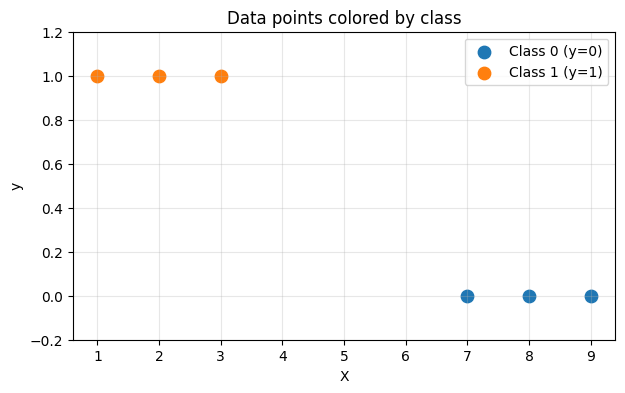

In [7]:
# Plot data with class colors
mask0 = (y.ravel() == 0)
mask1 = (y.ravel() == 1)

plt.figure(figsize=(7, 4))
plt.scatter(X[mask0].ravel(), y[mask0].ravel(), s=80, label="Class 0 (y=0)")
plt.scatter(X[mask1].ravel(), y[mask1].ravel(), s=80, label="Class 1 (y=1)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Data points colored by class")
plt.ylim(-0.2, 1.2)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()



<div style="background:#E8F4FF; border-left:6px solid #2B7DE9; padding:12px; border-radius:10px;">
<b>Step 6C — Plot the fitted line (Linear Regression) over the colored data</b><br>
We draw a smooth line using: <b>ŷ = w·x + b</b>
</div>


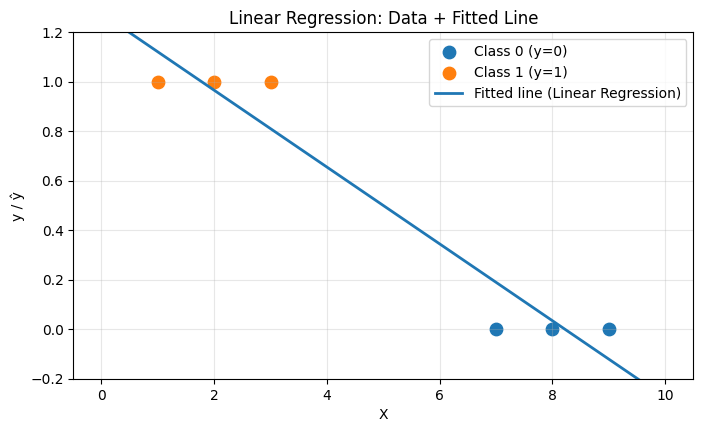

In [8]:
# Plot fitted line for linear regression over colored data
# (Assumes you already trained w_lin and b_lin on original X scale)

# Smooth X range for drawing the fitted line
x_fit = np.linspace(X.min() - 1, X.max() + 1, 400).reshape(-1, 1)

# Predicted line: y_hat = w*x + b
y_fit = (x_fit * w_lin + b_lin).ravel()

mask0 = (y.ravel() == 0)
mask1 = (y.ravel() == 1)

plt.figure(figsize=(8, 4.5))
plt.scatter(X[mask0].ravel(), y[mask0].ravel(), s=80, label="Class 0 (y=0)")
plt.scatter(X[mask1].ravel(), y[mask1].ravel(), s=80, label="Class 1 (y=1)")
plt.plot(x_fit.ravel(), y_fit, linewidth=2, label="Fitted line (Linear Regression)")
plt.xlabel("X")
plt.ylabel("y / ŷ")
plt.title("Linear Regression: Data + Fitted Line")
plt.ylim(-0.2, 1.2)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()



<div style="background:#E8F4FF; border-left:6px solid #2B7DE9; padding:12px; border-radius:10px;">
<b>Step 7 — Logistic Regression training (raw gradient descent)</b><br>
Model:<br>
<b>z = w·x + b</b><br>
<b>p = sigmoid(z) = 1 / (1 + exp(-z))</b><br><br>
Loss (Binary Cross-Entropy / Log Loss):<br>
<b>J = -mean( y·log(p) + (1-y)·log(1-p) )</b><br><br>
We again train on <code>X_std</code>, then convert parameters back to original scale.
</div>


In [9]:

# Initialize parameters (on standardized X)
w_log_s = 0.0
b_log_s = 0.0

# Safe-ish learning rate:
# For logistic, sigmoid' <= 1/4, so a rough Lipschitz bound is:
# L <= (1/(4n)) * (X^T X)
xtx = float((X_std.T @ X_std).ravel()[0])
L = (1.0 / (4.0 * n)) * xtx
lr_log = 1.0 / L
epochs_log = 5000

print("Logistic: xtx =", xtx)
print("Logistic: L   =", L)
print("Logistic: lr  =", lr_log)

loss_log_history = []
eps = 1e-12

for epoch in range(epochs_log):
    # Forward: z and sigmoid probability p
    z = X_std * w_log_s + b_log_s  # (n,1)

    # Stable sigmoid (done inline, no function)
    # p = 1/(1+exp(-z)) but use a stable branch to avoid overflow:
    p = np.empty_like(z)
    pos = z >= 0
    neg = ~pos
    p[pos] = 1.0 / (1.0 + np.exp(-z[pos]))
    expz = np.exp(z[neg])
    p[neg] = expz / (1.0 + expz)

    # Log loss (binary cross entropy), with clipping for numerical safety
    p_clip = np.clip(p, eps, 1 - eps)
    loss = float(-np.mean(y * np.log(p_clip) + (1 - y) * np.log(1 - p_clip)))
    loss_log_history.append(loss)

    if not np.isfinite(loss):
        print("Non-finite loss at epoch", epoch, "=> stopping")
        break

    # Gradients for logistic regression:
    # dJ/dw = (1/n) * sum( x * (p - y) )
    # dJ/db = (1/n) * sum( (p - y) )
    dw = float((1.0 / n) * np.sum(X_std * (p - y)))
    db = float((1.0 / n) * np.sum(p - y))

    # Update
    w_log_s = w_log_s - lr_log * dw
    b_log_s = b_log_s - lr_log * db

    if epoch % 500 == 0:
        print(f"epoch={epoch:4d} loss={loss:.6f} w_std={w_log_s:.6f} b_std={b_log_s:.6f}")

print("\nTrained (standardized scale):")
print("w_log_s =", w_log_s)
print("b_log_s =", b_log_s)

# Convert standardized parameters -> original scale (same transform as linear)
w_log = w_log_s / sigma
b_log = b_log_s - (w_log_s * mu / sigma)

print("\nConverted (original X scale):")
print("w_log =", w_log)
print("b_log =", b_log)


Logistic: xtx = 6.0
Logistic: L   = 0.25
Logistic: lr  = 4.0
epoch=   0 loss=0.693147 w_std=-1.929803 b_std=0.000000
epoch= 500 loss=0.001090 w_std=-8.986045 b_std=0.000000
epoch=1000 loss=0.000560 w_std=-9.995017 b_std=0.000000
epoch=1500 loss=0.000378 w_std=-10.593994 b_std=0.000000
epoch=2000 loss=0.000286 w_std=-11.022205 b_std=-0.000000
epoch=2500 loss=0.000230 w_std=-11.355973 b_std=-0.000000
epoch=3000 loss=0.000192 w_std=-11.629634 b_std=-0.000000
epoch=3500 loss=0.000166 w_std=-11.861627 b_std=-0.000000
epoch=4000 loss=0.000145 w_std=-12.063015 b_std=-0.000000
epoch=4500 loss=0.000129 w_std=-12.240962 b_std=0.000000

Trained (standardized scale):
w_log_s = -12.400070510474976
b_log_s = -3.5038725061589217e-15

Converted (original X scale):
w_log = -3.988281308145815
b_log = 19.94140654072907



<div style="background:#FFFBEB; border-left:6px solid #D69E2E; padding:12px; border-radius:10px;">
<b>Step 8 — Plot logistic regression training loss</b>
</div>


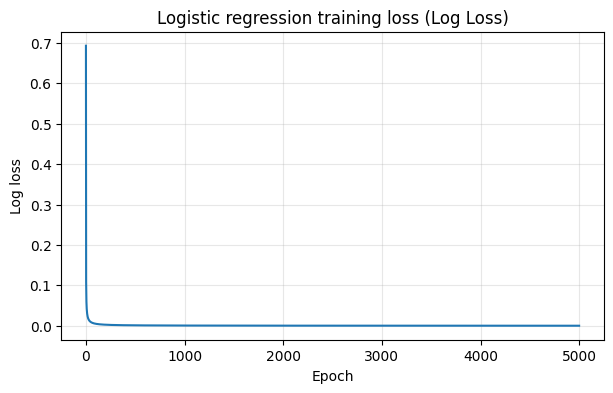

In [10]:

plt.figure(figsize=(7, 4))
plt.plot(loss_log_history)
plt.xlabel("Epoch")
plt.ylabel("Log loss")
plt.title("Logistic regression training loss (Log Loss)")
plt.grid(True, alpha=0.3)
plt.show()



<div style="background:#E8F4FF; border-left:6px solid #2B7DE9; padding:12px; border-radius:10px;">
<b>Step 9 — Visual comparison: Linear line vs Logistic sigmoid</b><br>
Now we plot both model outputs over the same X range:
<ul>
  <li>Linear regression output: <b>ŷ</b> (a line)</li>
  <li>Logistic regression output: <b>p</b> (a sigmoid curve)</li>
</ul>
</div>


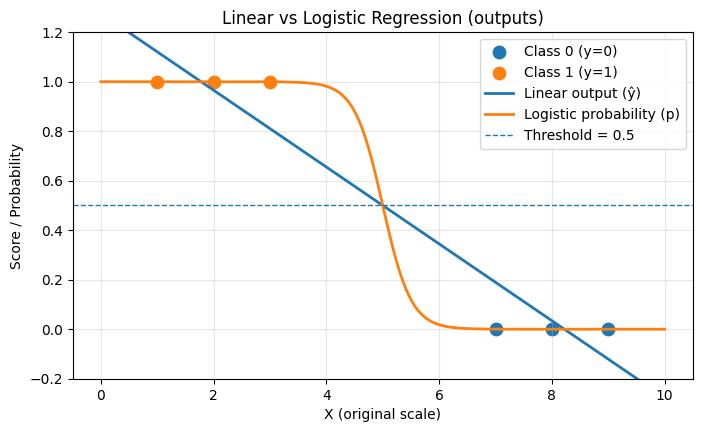

In [11]:
# Smooth x for plotting curves (original scale)
x_line = np.linspace(X.min() - 1, X.max() + 1, 400).reshape(-1, 1)

# Linear outputs (original scale): y = w*x + b
y_line_lin = (x_line * w_lin + b_lin).ravel()

# Logistic outputs (original scale): p = sigmoid(w*x + b)
z_line = x_line * w_log + b_log
p_line = 1.0 / (1.0 + np.exp(-z_line))  # ok here (z isn't huge in this range)
p_line = p_line.ravel()

# Color points by class
mask0 = (y.ravel() == 0)
mask1 = (y.ravel() == 1)

plt.figure(figsize=(8, 4.5))
plt.scatter(X[mask0].ravel(), y[mask0].ravel(), s=80, label="Class 0 (y=0)")
plt.scatter(X[mask1].ravel(), y[mask1].ravel(), s=80, label="Class 1 (y=1)")
plt.plot(x_line.ravel(), y_line_lin, linewidth=2, label="Linear output (ŷ)")
plt.plot(x_line.ravel(), p_line, linewidth=2, label="Logistic probability (p)")
plt.axhline(0.5, linestyle="--", linewidth=1, label="Threshold = 0.5")
plt.xlabel("X (original scale)")
plt.ylabel("Score / Probability")
plt.title("Linear vs Logistic Regression (outputs)")
plt.ylim(-0.2, 1.2)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()



<div style="background:#F0FFF4; border-left:6px solid #2F855A; padding:12px; border-radius:10px;">
<b>Step 10 — Decision boundary for logistic regression</b><br>
The point where <code>p=0.5</code> occurs when <code>w·x + b = 0</code>, so:
<br><br>
<b>x* = -b / w</b>
</div>


Decision boundary x* (p=0.5): 4.999999999999999


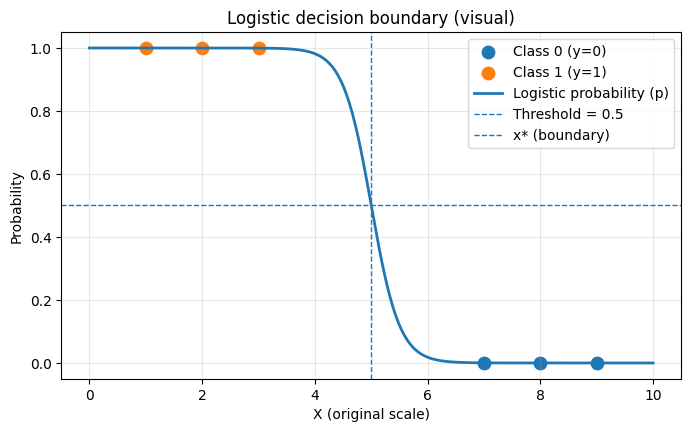

In [12]:
if w_log != 0:
    x_star = -b_log / w_log
    print("Decision boundary x* (p=0.5):", float(x_star))
else:
    x_star = np.nan
    print("w_log is 0 => boundary undefined")

# Color points by class
mask0 = (y.ravel() == 0)
mask1 = (y.ravel() == 1)

plt.figure(figsize=(8, 4.5))
plt.scatter(X[mask0].ravel(), y[mask0].ravel(), s=80, label="Class 0 (y=0)")
plt.scatter(X[mask1].ravel(), y[mask1].ravel(), s=80, label="Class 1 (y=1)")
plt.plot(x_line.ravel(), p_line, linewidth=2, label="Logistic probability (p)")
plt.axhline(0.5, linestyle="--", linewidth=1, label="Threshold = 0.5")
if np.isfinite(x_star):
    plt.axvline(float(x_star), linestyle="--", linewidth=1, label="x* (boundary)")
plt.xlabel("X (original scale)")
plt.ylabel("Probability")
plt.title("Logistic decision boundary (visual)")
plt.ylim(-0.05, 1.05)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()



<div style="background:#FFF5F5; border-left:6px solid #E53E3E; padding:12px; border-radius:10px;">
<b>Step 11 — Compare predictions on training points (raw numbers)</b><br>
We show:
<ul>
  <li>Linear regression score ŷ</li>
  <li>Logistic regression probability p</li>
</ul>
(No performance metrics here — just raw outputs so learners can compare.)
</div>


In [13]:

# Linear predictions on training X
y_lin_train = (X * w_lin + b_lin).ravel()

# Logistic predictions on training X
z_train = X * w_log + b_log
p_train = 1.0 / (1.0 + np.exp(-z_train))
p_train = p_train.ravel()

print(f"{'X':>4s} {'y':>3s} {'lin_ŷ':>10s} {'log_p':>10s}")
print("-"*33)
for xi, yi, a, pr in zip(X.ravel(), y.ravel().astype(int), y_lin_train, p_train):
    print(f"{xi:4.0f} {yi:3d} {a:10.4f} {pr:10.4f}")


   X   y      lin_ŷ      log_p
---------------------------------
   1   1     1.1207     1.0000
   2   1     0.9655     1.0000
   3   1     0.8103     0.9997
   7   0     0.1897     0.0003
   8   0     0.0345     0.0000
   9   0    -0.1207     0.0000



<div style="background:#E8F4FF; border-left:6px solid #2B7DE9; padding:12px; border-radius:10px;">
<b>Summary (what’s different?)</b><br><br>
<b>Linear Regression</b><br>
• Output is any real number (can go below 0 or above 1).<br>
• Tries to make predictions close to y in a squared-error sense.<br><br>
<b>Logistic Regression</b><br>
• Output is a probability between 0 and 1 (via sigmoid).<br>
• Tries to match 0/1 labels using log loss (penalizes confident wrong predictions strongly).<br>
</div>
